### Importing some required modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing our Dataset:
  * Importing from our local storage

In [2]:
imdb = pd.read_csv(r"C:\Users\mahes\Desktop\Projects DS\Project-3\IMDB Dataset.csv")
imdb.shape

(50000, 2)

In [3]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
columns = []
for i in imdb.columns:
    columns.append(i)
columns    

['review', 'sentiment']

In [5]:
for i in imdb.columns:
    print("unique values in dataset", i , "is = ", len(np.unique(imdb[i])))

unique values in dataset review is =  49582
unique values in dataset sentiment is =  2


* review column has 5000 rows and only 8-Non unique rows

In [6]:
imdb.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
imdb.isnull().sum()

review       0
sentiment    0
dtype: int64

# Data Visualization:

C:\Users\mahes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


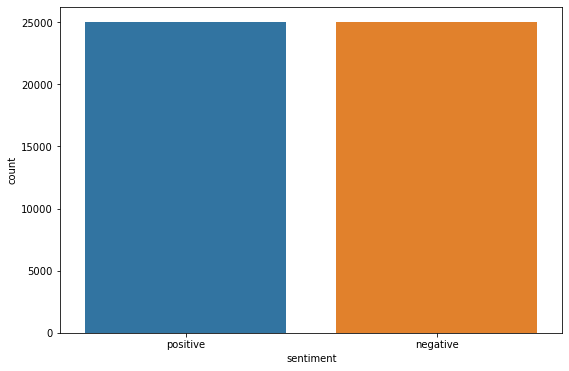

In [8]:
plt.figure(figsize=[9, 6])
sns.countplot("sentiment", data=imdb)
plt.show()

### Label encoding of our target column:

In [9]:
def converting_target(x):
    if x == 'negative':
        return 0
    else:
        return 1
imdb['sentiment'] = imdb['sentiment'].apply(converting_target)

In [10]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


### Spliting our data into X, y:

In [11]:
X = imdb['review']
y = imdb['sentiment']

In [12]:
X.head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [13]:
y = np.array(y)
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Artificial Neural Language Processing:

In [14]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Embedding

In [15]:
token = Tokenizer(num_words=10000, oov_token='UNK')
token.fit_on_texts(X)

In [16]:
X = token.texts_to_sequences(X)

In [17]:
X_pad = pad_sequences(X, maxlen=200, padding='post')

In [18]:
X_pad[1]

array([   4,  394,  121,  354,    8,    8,    2, 1386, 2978,    7,   53,
          1,   53,  156,   56, 2382, 1583,    3,  412,    4,    1,    3,
        531,    1,  283,    5, 1848,    6,    2,  439,  413,    8,    8,
          2,  151,   24,  569,   70, 2275,  499, 4572,   22,   62,   46,
        190,   30,    2,    1,   19,   29,   46,   30,    2, 2295,  176,
       3337,   97,   23,   68,  372,   64,    2,    1,  792, 9720,   32,
          2, 1826,    6,    1, 7367, 6595,   22,   62,    7,   10,   70,
        279,    2,  148,   19,   10,    7,    4,    1,  408,    3, 2407,
        413,    4, 4340,  354,   43,   28,    5,    2,   79,    1,    5,
        203,    3,   25,  115,    8,    8,    2, 1848,   63,  271,  345,
         17,    2,  121,  178,    2, 1030,    5,    2, 2925,   61,  249,
         72,  357,    2, 2207,    1, 3128, 1290, 1193,   92, 4912,   10,
        298,   21,  261, 1831,    3,  261, 4593,  584,   17,    2,  135,
       3691,    1,    3,    1,    3,    2,  731,  5

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 200), (10000, 200), (40000,), (10000,))

In [21]:
X_train

array([[  11,   77,   54, ...,  847,    1, 9680],
       [   6,  450,   29, ...,  903,  428,   18],
       [ 137,   11, 2754, ...,    0,    0,    0],
       ...,
       [  49,    7,   12, ...,    0,    0,    0],
       [ 124,  555,    5, ...,    0,    0,    0],
       [ 185,    6,   27, ...,   16,    4,  779]])

In [22]:
y_train

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [24]:
X_pad.shape

(50000, 200)

In [25]:
ann = Sequential()



ann.add(Dense(150, input_shape=(200, )))
ann.add(Activation("softmax"))


ann.add(Dense(120))
ann.add(Activation("softmax"))


ann.add(Dense(70))
ann.add(Activation("softmax"))


ann.add(Dense(30))
ann.add(Activation("softmax"))



#Output layer
ann.add(Dense(1))
ann.add(Activation("sigmoid"))



ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               30150     
_________________________________________________________________
activation (Activation)      (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               18120     
_________________________________________________________________
activation_1 (Activation)    (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 70)                8470      
_________________________________________________________________
activation_2 (Activation)    (None, 70)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                2

In [26]:
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [27]:
ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1250/1250 [==============================] - 5s 3ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 2/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.5008
Epoch 3/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5008
Epoch 4/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6933 - accuracy: 0.4952 - val_loss: 0.6932 - val_accuracy: 0.4992
Epoch 5/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6932 - val_accuracy: 0.4992
Epoch 6/15
1250/1250 [==============================] - 6s 4ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 7/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6933 - val_accuracy: